<h3 style="color:purple">Practicle:5 K-neighbour classifier</h1>
<h3 style="color:purple">2021BIT023   Vaibhav Lanjewar</h3>


<h2 style="color:brown">Import libraries</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Import Dataset 

In [2]:
df = pd.read_csv('diabetes.csv')
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [3]:
df.shape # dim of dataset , row,col

(768, 9)

In [4]:
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,train_size=0.7)


## K-neighbour classifier model

In [7]:

from sklearn.neighbors import KNeighborsClassifier


neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
   
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

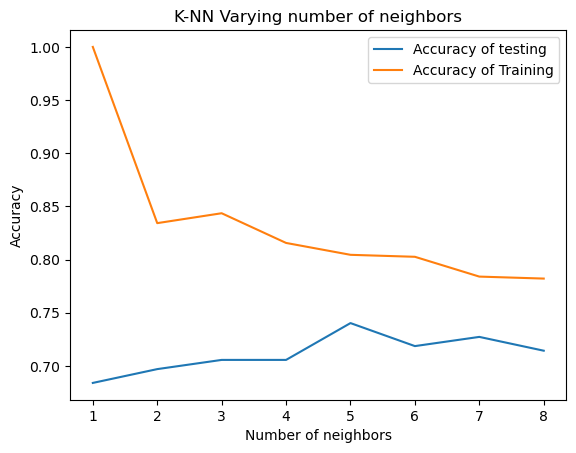

In [8]:
plt.title('K-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Accuracy of testing')
plt.plot(neighbors, train_accuracy, label='Accuracy of Training')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [9]:
knn = KNeighborsClassifier(n_neighbors=3)

In [10]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
knn.score(X_test,y_test)

0.7056277056277056

In [12]:
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

confusion_matrix(y_test,y_pred)


array([[120,  35],
       [ 33,  43]], dtype=int64)

In [13]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,0,1,All
True,,,
0,120,35,155
1,33,43,76
All,153,78,231


## Classification report

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.78      0.77      0.78       155
           1       0.55      0.57      0.56        76

    accuracy                           0.71       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.71      0.71      0.71       231



## Grid Search CV

In [15]:
#importing  Grid Search CV
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [16]:
knn_cv.best_score_

0.7578558696205755

In [17]:
knn_cv.best_params_


{'n_neighbors': 14}